[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


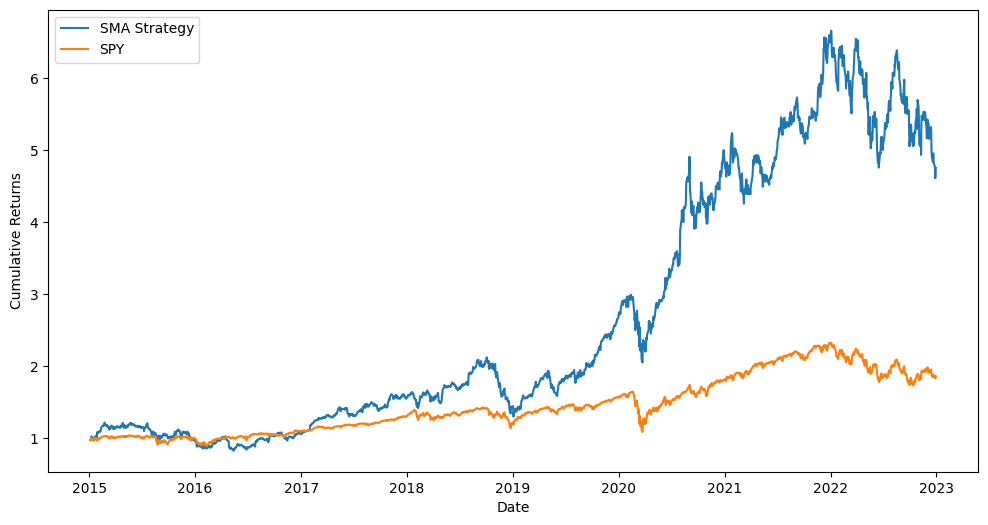

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

symbol = 'AAPL'
start_date = '2015-01-01'
end_date = '2022-12-31'

data = yf.download(symbol, start=start_date, end=end_date)

data['SMA_50'] = data['Close'].rolling(window=50).mean()

data['Daily_Return'] = data['Close'].pct_change()

data['Strategy_Return'] = data['Daily_Return'] 

# * data['Signal'].shift(1)

data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

spy_data = yf.download('SPY', start=start_date, end=end_date)

spy_data['Daily_Return'] = spy_data['Close'].pct_change()

spy_data['Cumulative_Return'] = (1 + spy_data['Daily_Return']).cumprod()

plt.figure(figsize=(12, 6)) 
plt.plot(data.index, data['Cumulative_Return'], label='SMA Strategy') 
plt.plot(spy_data.index, spy_data['Cumulative_Return'], label='SPY') 
plt.xlabel('Date') 
plt.ylabel('Cumulative Returns') 
plt.legend() 
plt.show()